# Plotly Express

In [89]:
import plotly
import plotly.express as px 
import seaborn as sns

In [93]:
iris = px.data.iris() 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


## Scatter, Bar, Line

### Scatter

In [23]:
fig = px.scatter(iris, 
                 x='sepal_length',
                 y='petal_length',
                 size='sepal_length',
                 color='species',
#                  range_x=[4, 8], # 보여줄 축의 범위
#                  range_y=[0, 7],
#                  marginal_y="violin", # 각 축의 통계 분포 데이터
#                  marginal_x="box", 
                 hover_data=['sepal_width', 'petal_width'], # 마우스 호버링 시 표시되는 데이터
                 hover_name='species',
#                  trendline="ols", # 회귀선
#                  facet_col='species',
                 facet_row='species',
            )
fig.show()

### Line

In [25]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [26]:
fig = px.line(flights, 
              x='year',
              y='passengers',
              color='month',
            )
fig.show()

### Bar

In [90]:
medals = px.data.medals_long()
medals

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [91]:
fig = px.bar(medals, 
             x="nation", 
             y="count", 
             color="medal",
             barmode="group",
            )
fig.show()

## 다양한 차트

### Part-of-Whole

In [86]:
tips = px.data.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [87]:
fig = px.sunburst(tips, 
                  path=['day', 'time', 'sex'], 
                  values='total_bill')
fig.show()

In [88]:
fig = px.treemap(tips, 
                  path=['day', 'time', 'sex'], 
                  values='total_bill')
fig.show()

### 3-Dimensional

In [94]:
fig = px.scatter_3d(iris, 
                    x='sepal_length',
                    y='sepal_width', 
                    z='petal_width',
                    symbol='species',
                    color='species')
fig.show()

### Multidimensional

In [36]:
fig = px.parallel_coordinates(iris, 
                              color="species_id", 
                             )
fig.show()

In [35]:
tips = px.data.tips()
tips['sex'] = tips['sex'].apply(lambda x : 'red' if x=='Female' else 'gray')
fig = px.parallel_categories(tips, color='sex')
fig.show()

### Geo

In [37]:
geo = px.data.gapminder()#.query("year == 2007")
geo.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [38]:
fig = px.scatter_geo(geo, 
                     locations="iso_alpha",
                     color="continent", 
                     size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

In [41]:
fig = px.choropleth(geo, 
                     locations="iso_alpha",
                     color="continent", 
                     projection="equirectangular")
fig.show()

#  Custom Matplotlib Theme

In [42]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from cycler import cycler

In [43]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255

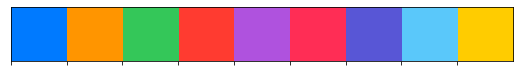

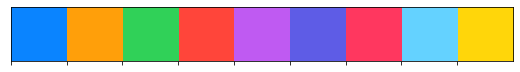

In [44]:
# palette 확인해보기
sns.palplot(light_palette) 
sns.palplot(dark_palette)

In [47]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)

In [48]:
# 배경 수정
bg = np.array((44, 44, 46))/255
mpl.rcParams['figure.facecolor']  = bg
mpl.rcParams['figure.edgecolor']  = bg
mpl.rcParams['axes.facecolor'] =  bg

In [49]:
# 글자색 변경
white_color = np.array((229, 229, 234))/255
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

In [50]:
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200

In [54]:
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

## 예시

In [52]:
student = pd.read_csv('./StudentsPerformance.csv')
iris = pd.read_csv('./Iris.csv')

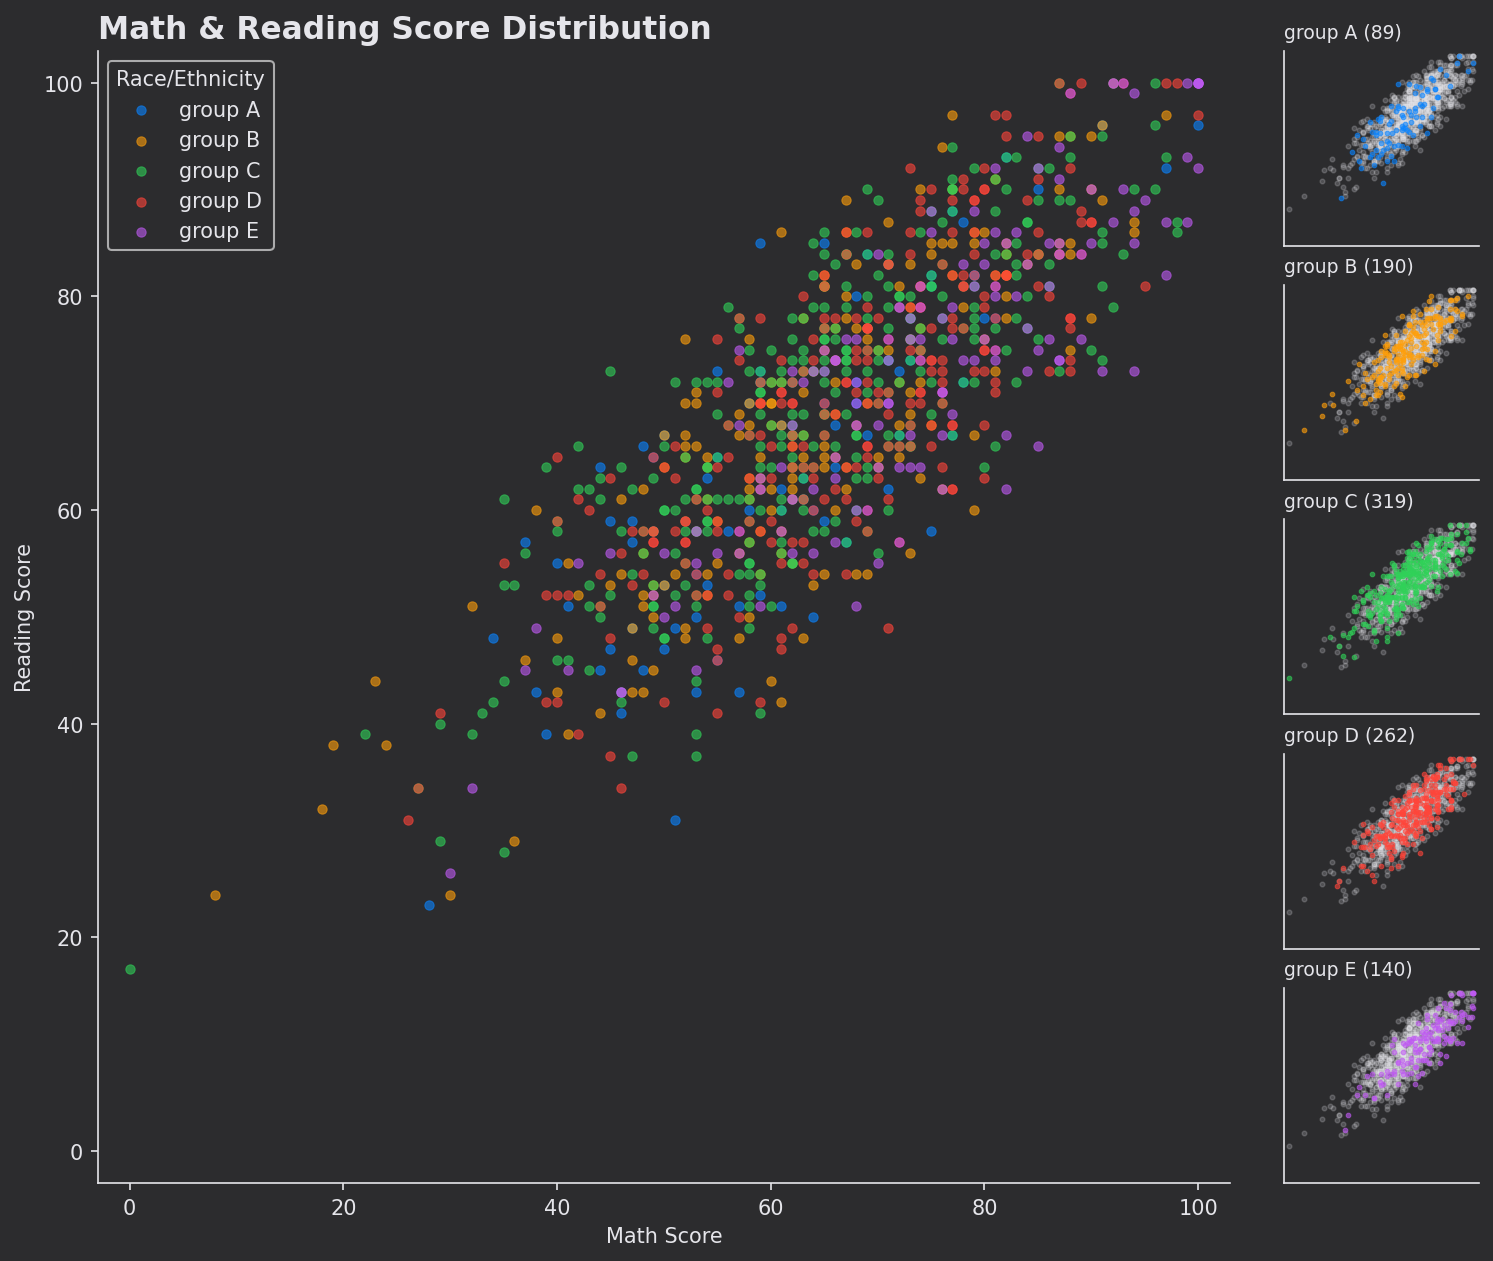

In [55]:
def score_distribution(f1, f2):
    fig = plt.figure(figsize=(12, 10),dpi=150)

    gs = fig.add_gridspec(5, 6) # 다른 크기의 그래프를 위해 grid를 나눔.

    ax = fig.add_subplot(gs[:,:5])
    ax.set_aspect(1)

    for group in sorted(student['race/ethnicity'].unique()):
        student_sub = student[student['race/ethnicity']==group]
        ax.scatter(student_sub[f'{f1} score'], student_sub[f'{f2} score'], 
                   s=20, alpha=0.6, 
                   linewidth=0.5, 
                   label=group
                  )

    sub_axes = [None] * 5
    for idx, group in enumerate(sorted(student['race/ethnicity'].unique())):
        sub_axes[idx] = fig.add_subplot(gs[idx,5], aspect=1) # 오른쪽 끝 grid
        sub_axes[idx].scatter(student[student['race/ethnicity']!=group][f'{f1} score'], student[student['race/ethnicity']!=group][f'{f2} score'], 
                              s=5, alpha=0.2, 
                              color= white_color,
                              linewidth=0.7, 
                              label=group,
                              zorder=5
                  )
        sub_axes[idx].scatter(student[student['race/ethnicity']==group][f'{f1} score'], student[student['race/ethnicity']==group][f'{f2} score'], 
                              s=5, alpha=0.6, 
                              color= dark_palette[idx],
                              linewidth=0.5, 
                              label=group,
                              zorder=10
                  )
        cnt = (student['race/ethnicity']==group).sum()
        sub_axes[idx].set_title(f'{group} ({cnt})', loc='left', fontsize=9)
        sub_axes[idx].set_xticks([]) # 작은 플롯들은 축 눈금을 없앰.
        sub_axes[idx].set_yticks([])

    for axes in [ax] + sub_axes:
        axes.set_xlim(-3, 103)
        axes.set_ylim(-3, 103)

    ax.set_title(f'{f1.capitalize()} & {f2.capitalize()} Score Distribution', loc='left', fontsize=15, fontweight='bold')    
    ax.set_xlabel(f'{f1.capitalize()} Score', fontweight='medium')
    ax.set_ylabel(f'{f2.capitalize()} Score', fontweight='medium')
    ax.legend(title='Race/Ethnicity', fontsize=10)

    plt.show()
    
score_distribution('math', 'reading')

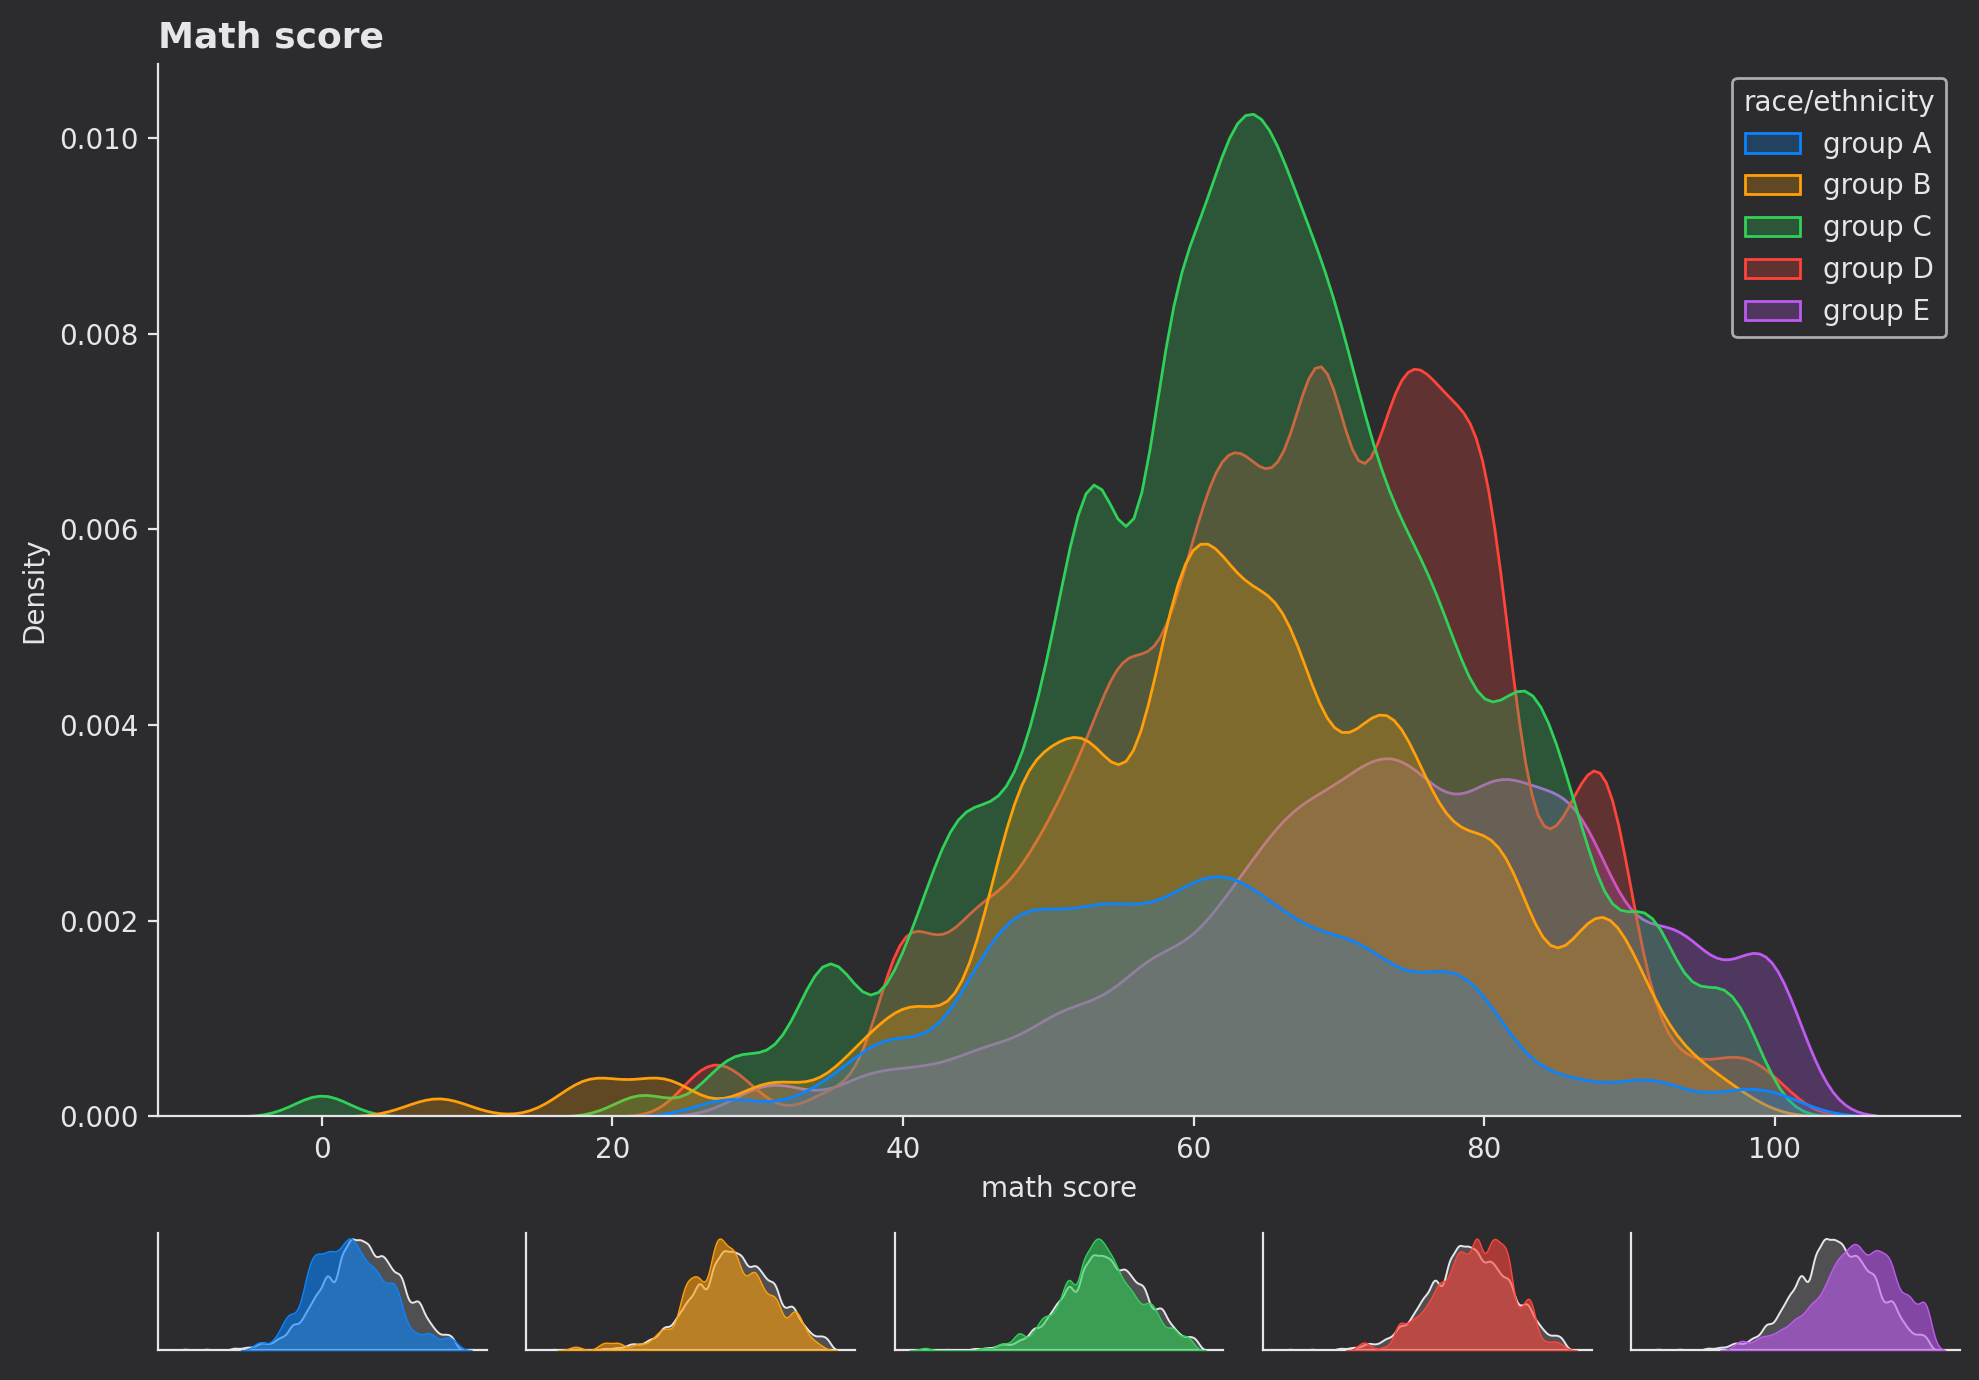

In [56]:
def score_distribution_kde(subject):
    fig = plt.figure(figsize=(10, 7))
    gs = fig.add_gridspec(6, 5)
    ax = fig.add_subplot(gs[:5,:])

    sns.kdeplot(x=subject, hue='race/ethnicity', data=student,
                hue_order=sorted(student['race/ethnicity'].unique()),
                bw_adjust=0.4,
                fill=True,ax=ax)
    

    sub_axes = [None] * 5
    for idx, group in enumerate(sorted(student['race/ethnicity'].unique())):
        sub_axes[idx] = fig.add_subplot(gs[5,idx])
        sns.kdeplot(x=subject, data=student,
                    alpha=0.2, 
                  color= white_color,
                  linewidth=0.7, 
                  label=group, fill=True, bw_adjust=0.4,
                  zorder=5, ax=sub_axes[idx]
                  )

        sns.kdeplot(x=subject, data=student[student['race/ethnicity']==group],
                    alpha=0.6, 
                      color= dark_palette[idx],
                      linewidth=0.5, 
                      label=group, fill=True,bw_adjust=0.4,
                      zorder=10, ax=sub_axes[idx]
                  )
        cnt = (student['race/ethnicity']==group).sum()
        sub_axes[idx].set_xticks([])
        sub_axes[idx].set_yticks([])
        sub_axes[idx].set_xlabel('')
        sub_axes[idx].set_ylabel('')

    ax.set_title(subject.capitalize(), loc='left', fontweight='bold', fontsize=13)

    fig.tight_layout()
    plt.show()    
    
score_distribution_kde('math score')

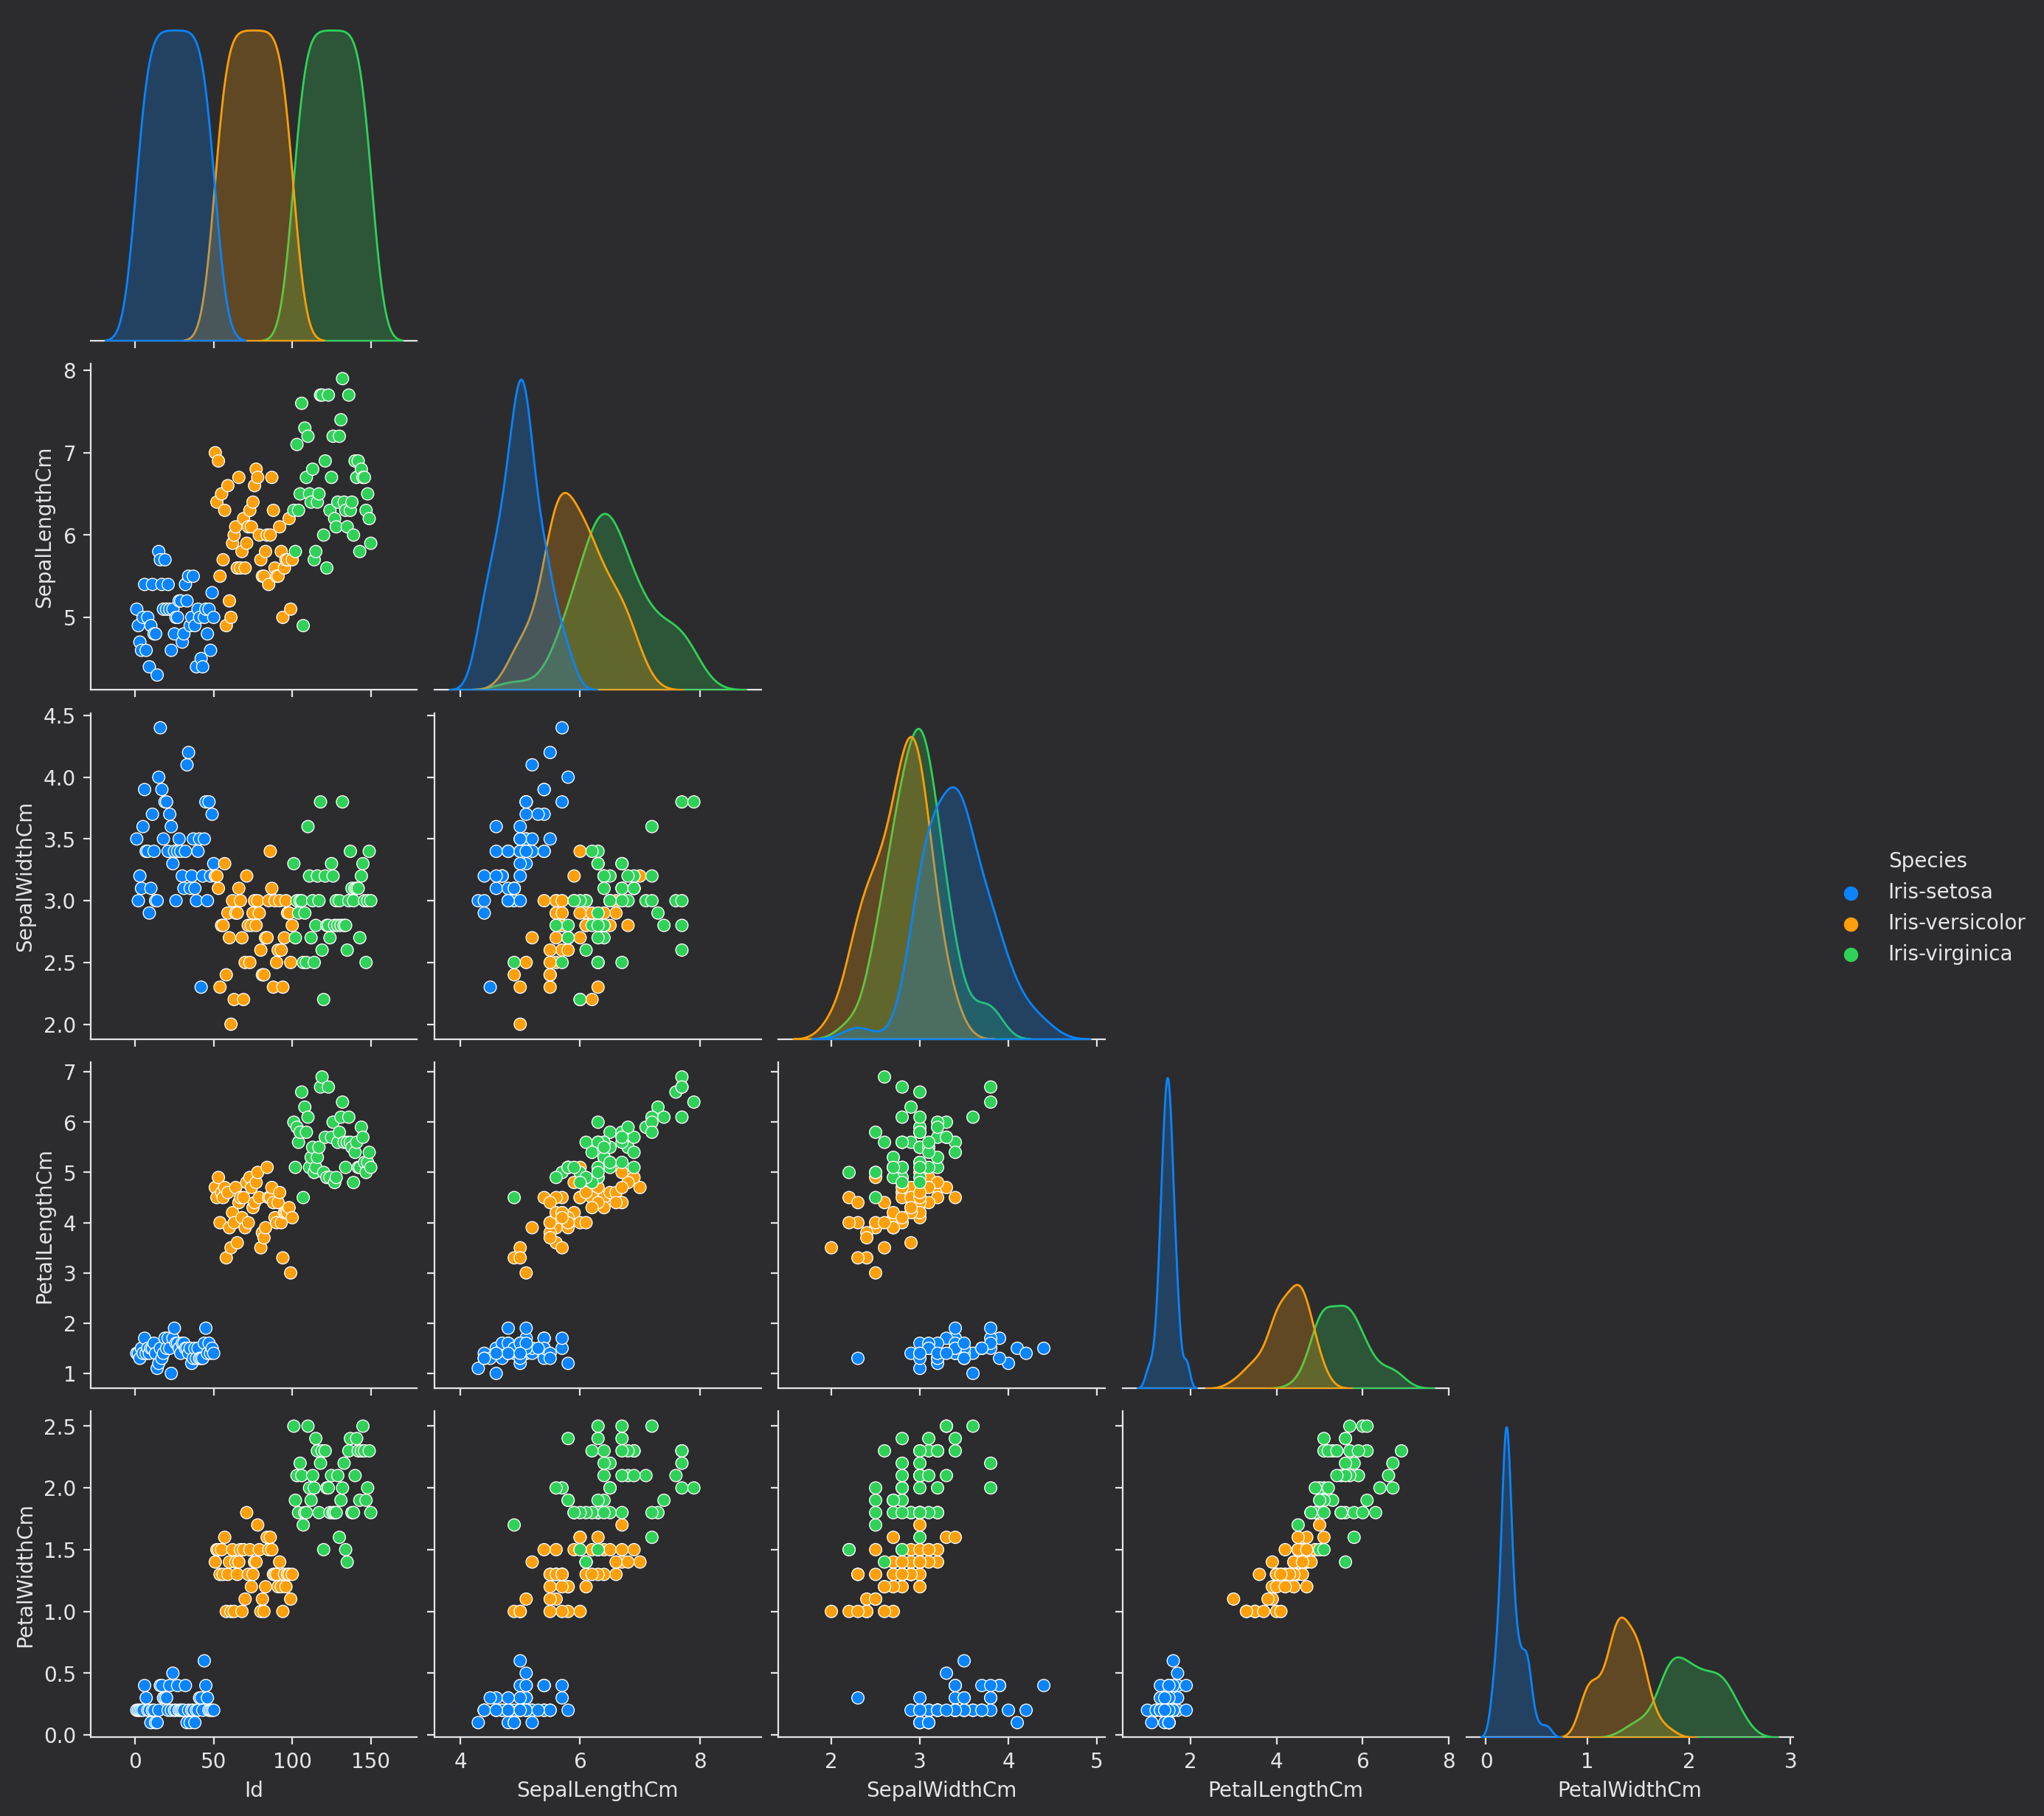

In [57]:
sns.pairplot(iris, hue='Species', corner=True)

In [64]:
import plotly.graph_objects as go

x, y, z = student['math score'], student['reading score'], student['writing score']
gtc = dict(zip(sorted(student['race/ethnicity'].unique()), raw_dark_palette[:5]))
color = student['race/ethnicity'].map(gtc)
gray = (44, 44, 46)

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=color,
        opacity=0.8
    )
)], layout=go.Layout(
    plot_bgcolor='rgba(255,0,0,1)',
    paper_bgcolor=f'rgb{gray}',
    font=dict(color='white'))
)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(scene = dict(
                    xaxis_title='MATH',
                    yaxis_title='READING',
                    zaxis_title='WRITING',
    
                    xaxis = dict(
                         gridcolor="white",
                         showbackground=False,
                         zerolinecolor="white",
                        range=[0, 100]
                    ),
                    yaxis = dict(
                        gridcolor="white",
                         showbackground=False,
                        zerolinecolor="white",
                        range=[0, 100]
                    ),
                    zaxis = dict(
                        gridcolor="white",
                         showbackground=False,
                        zerolinecolor="white",
                        range=[0, 100]                    
                    )),
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )

camera = dict(
    eye=dict(x=1.4, y=1.4, z=1.4)
)

fig.update_layout(scene_camera=camera)
fig.show()

# Image & Text Visualization Techniques

## Image Dataset Visualization

In [65]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits['data']
target = digits['target']

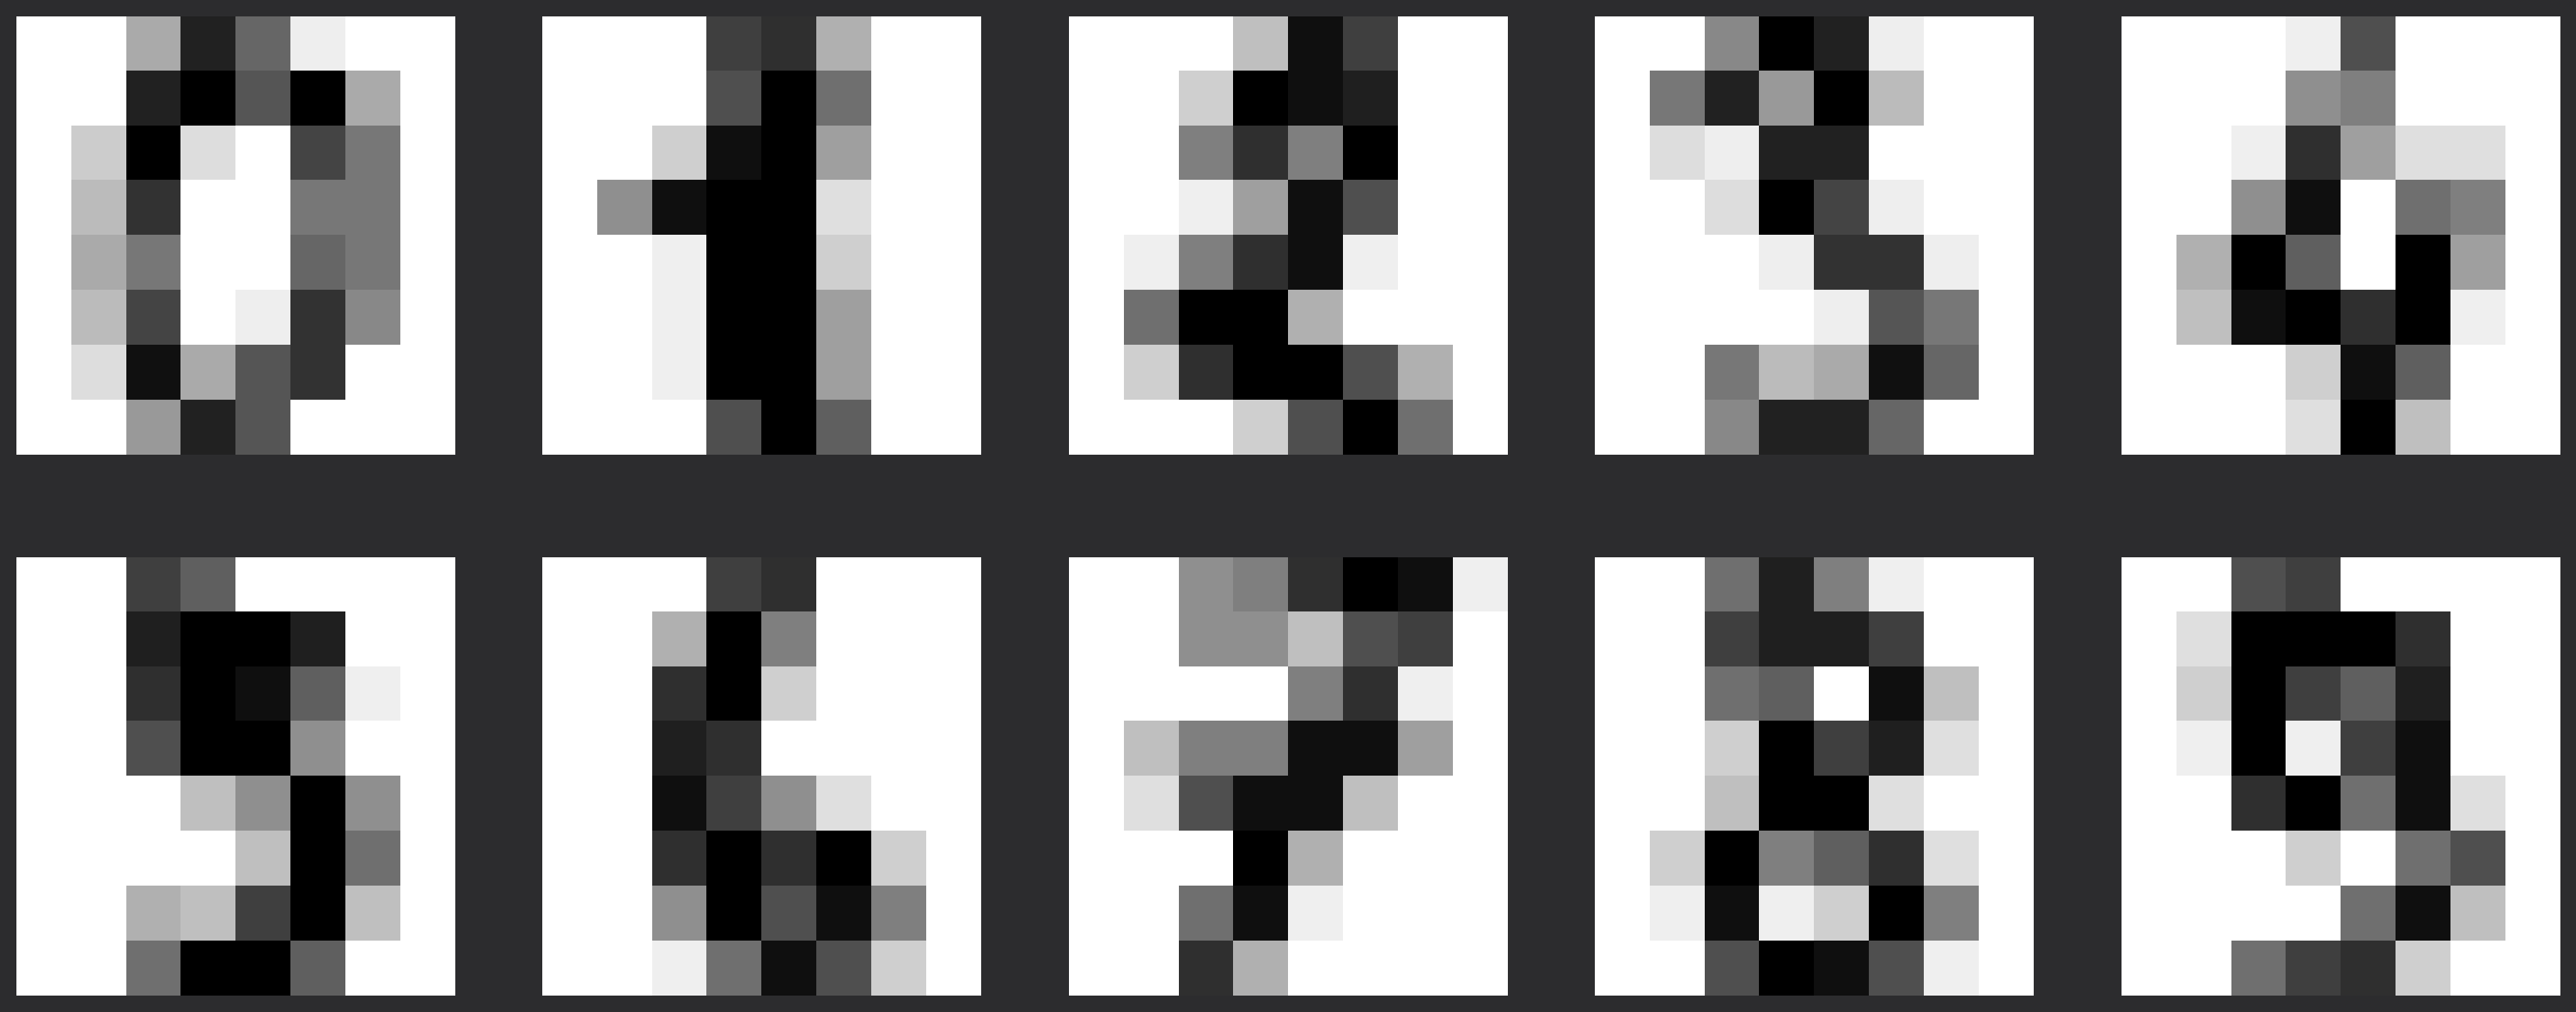

In [66]:
# 이미지 나열
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i in range(10):
    axes[i].imshow(data[i].reshape(8, 8), 
                   cmap='gray_r'
                  )

    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].axis('off')

plt.show()

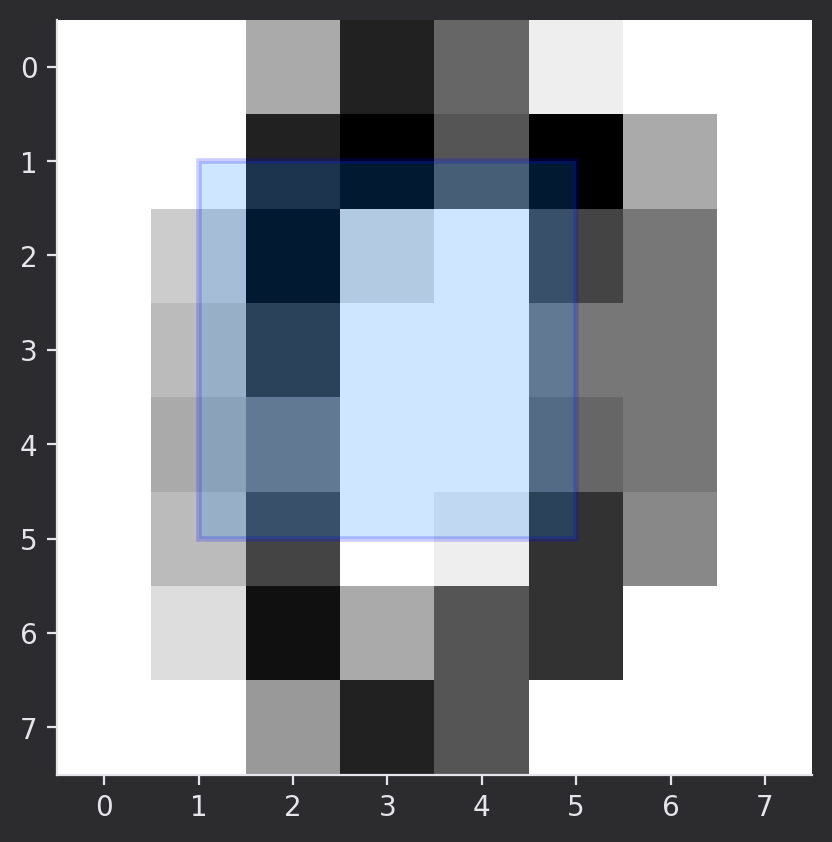

In [70]:
# patch
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.imshow(data[0].reshape(8, 8), cmap='gray_r')
# ax.axis('off')

rect = patches.Rectangle((1, 1), # (x, y)
                         4, 4,   # dx, dy
                         alpha=0.2, linewidth=2, edgecolor='b')
ax.add_patch(rect)
plt.show()

In [71]:
# dimension reduction
from umap import UMAP

data = digits['data']
target = digits['target']

umap = UMAP(random_state=0)
data_dr = umap.fit_transform(data, target)

In [77]:
print(data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [78]:
print(target)

[0 1 2 ... 8 9 8]


In [72]:
colors = plt.cm.get_cmap('tab10').colors
colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

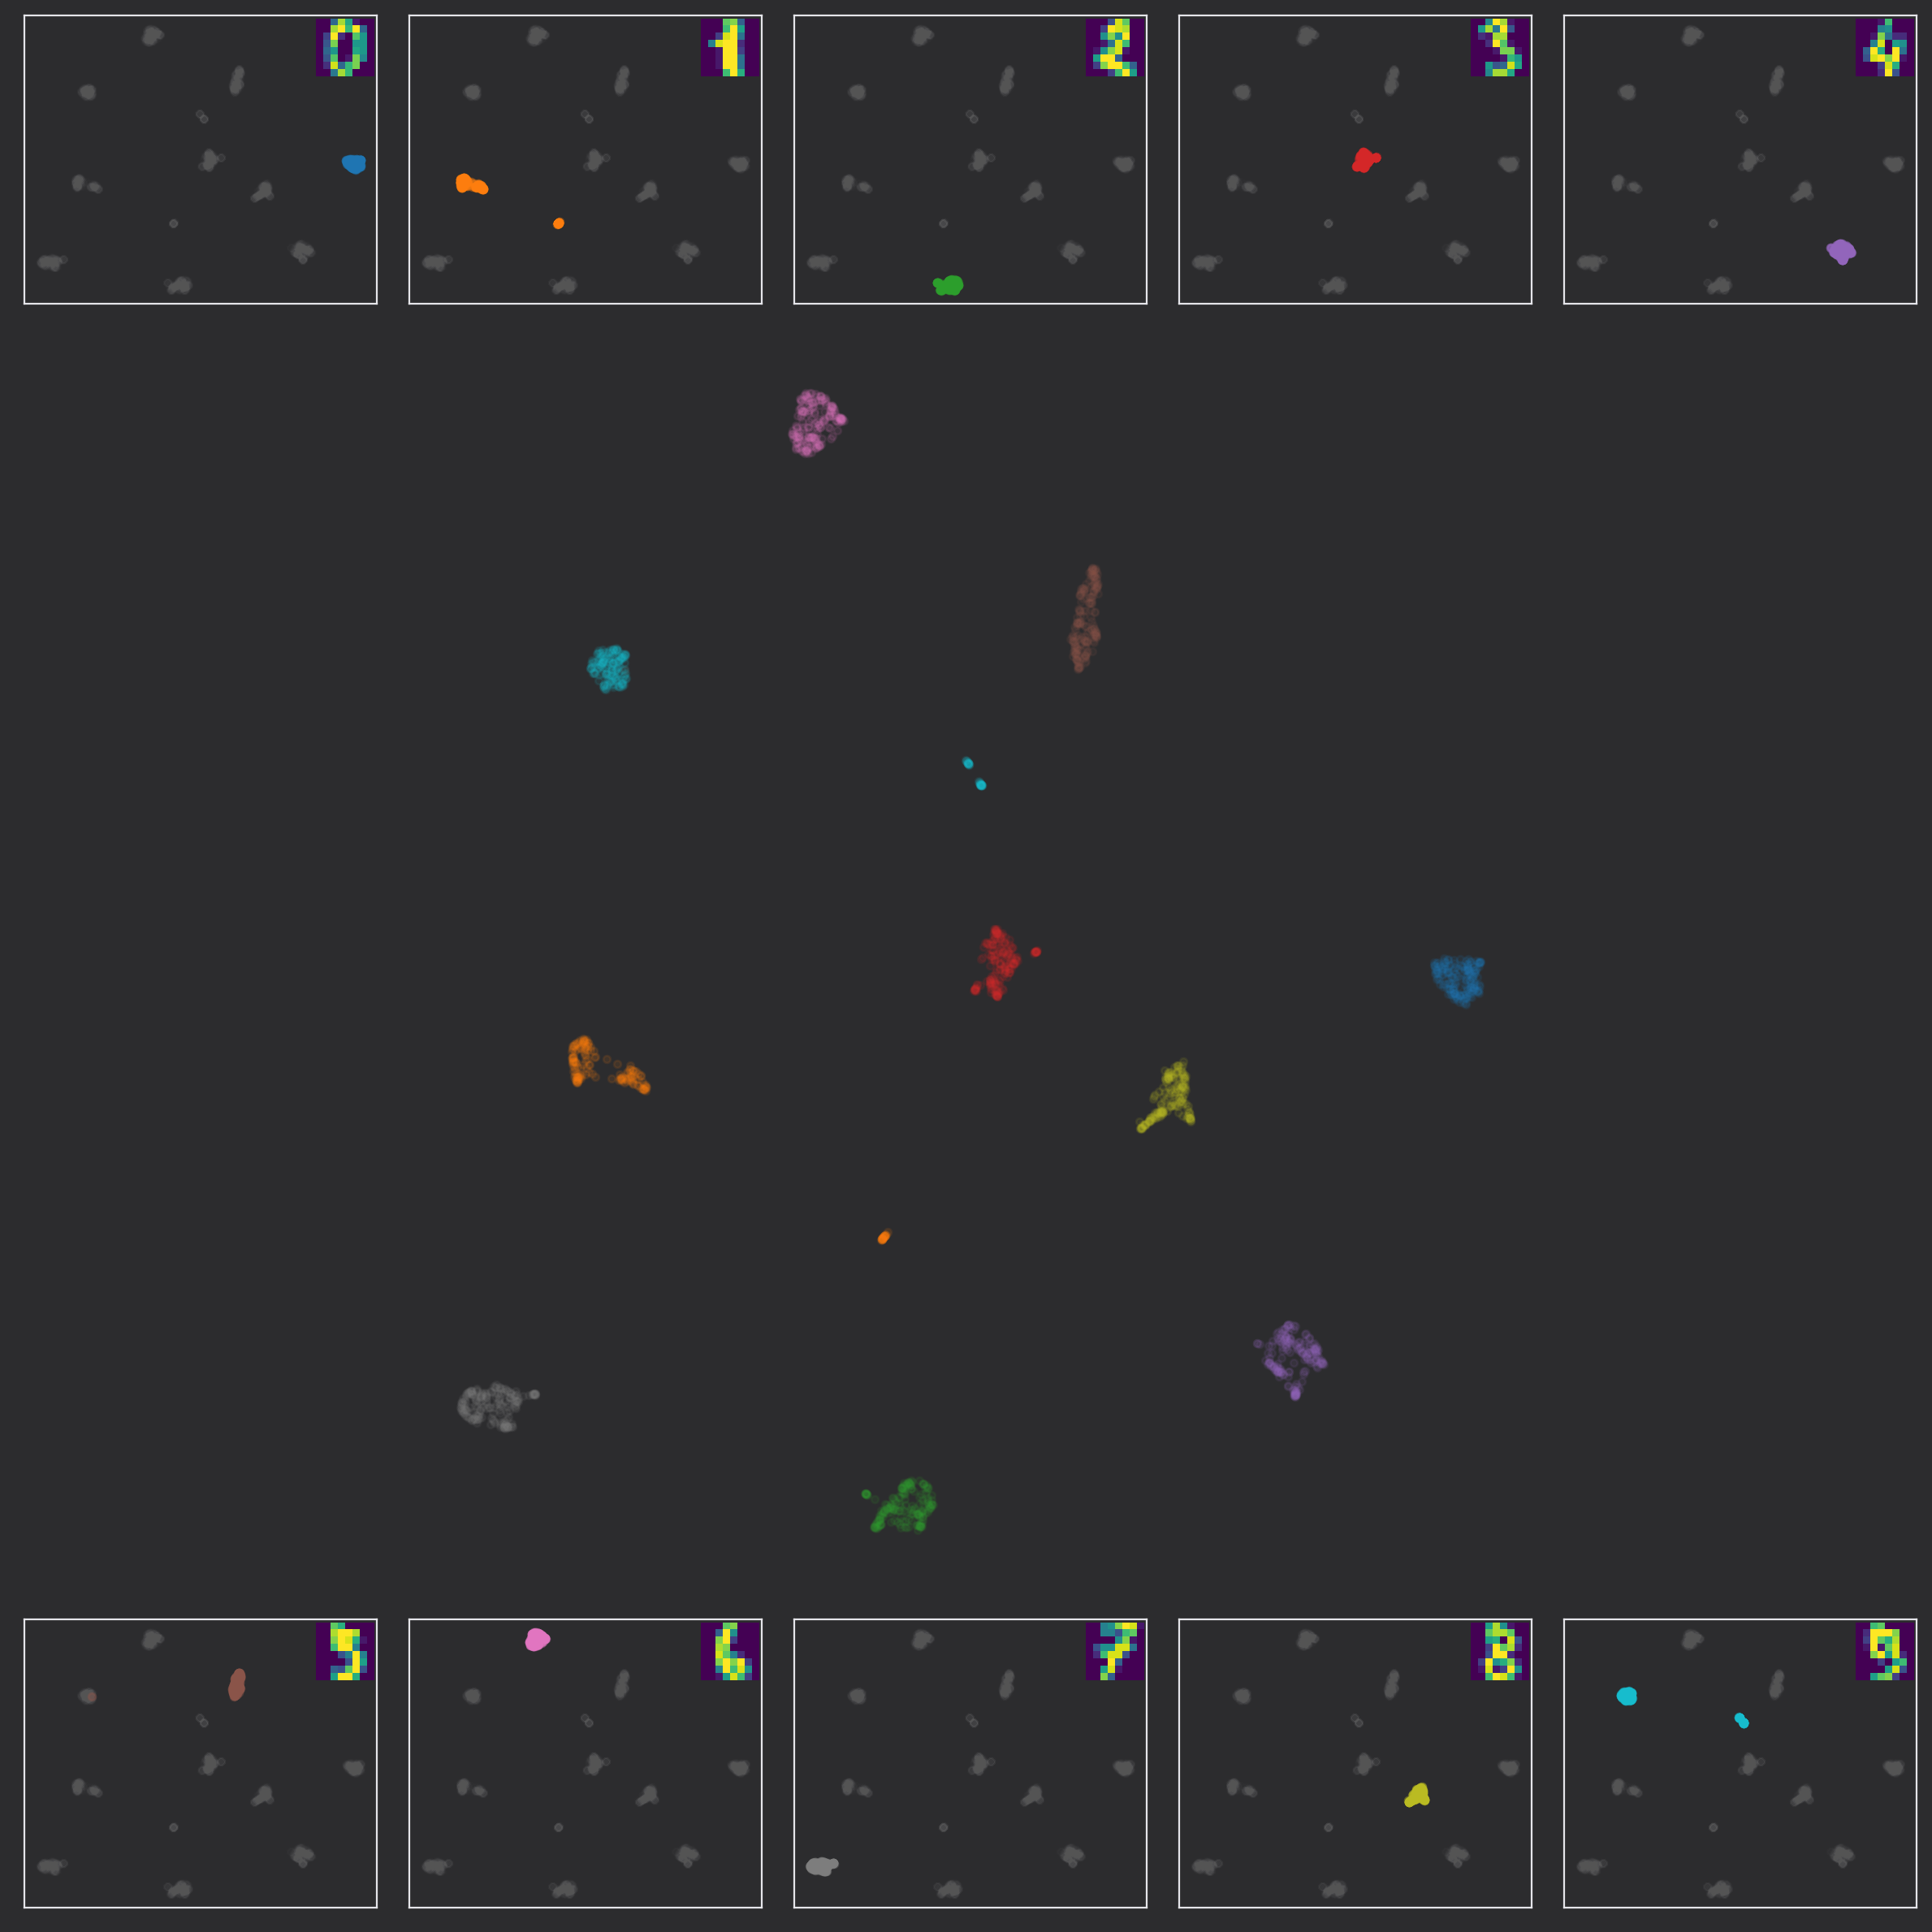

In [75]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(6, 5)
ax = fig.add_subplot(gs[1:-1,1:-1])

sub_axes = [None] * 10
for idx in range(10): 
    sub_axes[idx] = fig.add_subplot(gs[0-idx//5,idx%5])

for idx in range(10):
    ax.scatter(x=data_dr[:,0][target==idx], y=data_dr[:,1][target==idx],
              s=10, alpha=0.1, color=colors[idx]
              )

    for j in range(10):
        sub_axes[j].scatter(x=data_dr[:,0][target==idx], y=data_dr[:,1][target==idx],
                            s=10, alpha = 0.4 if idx==j else 0.008, 
                            color = (colors[j]) if idx==j else 'lightgray',
                            zorder=(idx==j)
                           )
        
    
    inset_ax = sub_axes[idx].inset_axes([0.81, 0.79, 0.2, 0.2])
    inset_ax.axis('off')
    
    num_idx = target.tolist().index(idx)
    inset_ax.imshow(data[num_idx].reshape(8, 8),)
    
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    sub_axes[idx].set_xlabel('')
    sub_axes[idx].set_ylabel('')
    sub_axes[idx].spines['right'].set_visible(True)
    sub_axes[idx].spines['top'].set_visible(True)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.axis('off')

fig.tight_layout()
plt.show()

## Text Dataset Visualization

In [76]:
from termcolor import colored, cprint

print(colored('hello', 'red'), colored('world', 'green'))

hello world


In [83]:
# HTML
from IPython.core.display import HTML

HTML("<span style='color:red'>hello</span> <span style='background-color:yellow'>world</span>")